In [112]:
import pandas as pd # type: ignore
import numpy as np # type:ignore
import seaborn as sns  # type: ignore
import matplotlib.pyplot as plt #type:ignore
from ipywidgets import interact, interactive,fixed, interact_manual #type:ignore
from sklearn.model_selection import train_test_split #type:ignore
from sklearn.linear_model import LinearRegression #type:ignore
from sklearn.model_selection import cross_val_score,cross_val_predict #type:ignore
from sklearn.preprocessing import PolynomialFeatures #type:ignore
from sklearn.linear_model import Ridge #type:ignore
from tqdm import tqdm #type:ignore
from sklearn.model_selection import GridSearchCV #type:ignore
%matplotlib inline

In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv"

In [3]:
df = pd.read_csv(file_path, header=0)

In [4]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [6]:
df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)

In [7]:
df.head(1)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1


# Functions For Plotting


In [91]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 7
    height = 5
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName)

    plt.title(Title)
    plt.xlabel("Price (in $)")
    plt.ylabel("ProPortion of Cars")
    plt.show()
    plt.close()

In [69]:
def PlotPolly(xTrain, xTest, Y_train, Y_test, lr, poly_transform):
    width = 7
    height = 5
    plt.figure(figsize=(width, height))

    xmax = max([xTrain.values.max(), xTest.values.max()])
    xmin = min([xTrain.values.min(), xTest.values.min()])

    x = np.arange(xmin, xmax, 0.1)

    plt.plot(xTrain, Y_train, 'ro', label='Training Data')
    plt.plot(xTest, Y_test, 'go', label="Test Data")
    plt.plot(x, lr.predict(poly_transform.fit_transform(
        x.reshape(-1, 1))), label="Predicted Function")
    plt.ylim(-10000, 60000)
    plt.ylabel("Price")

# Training and Testing


In [16]:
y_data = df['price']
x_data = df.drop(['price'], axis=1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.10, random_state=1)

print(f"Number Of test Samples {x_test.shape[0]}")
print(f"Number of training sample {x_train.shape[0]}")

Number Of test Samples 21
Number of training sample 180


In [21]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(
    x_data, y_data, test_size=0.40, random_state=0)

print(f"Number Of test Samples {x_test1.shape[0]}")
print(f"Number of training sample {x_train1.shape[0]}")

Number Of test Samples 81
Number of training sample 120


In [23]:
lr = LinearRegression()

In [24]:
lr.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [25]:
lr.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [26]:
lr.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [30]:
lr.fit(x_train1[["horsepower"]], y_train1)
lr.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

# Cross-Validation Score


In [32]:
Rcross = cross_val_score(lr, x_data[['horsepower']], y_data, cv=4)

In [33]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [34]:
print(
    f"The means of the fold are {Rcross.mean()} and the standard Deviation is {Rcross.std()}")

The means of the fold are 0.522009915042119 and the standard Deviation is 0.2911839444756029


In [35]:
-1 * cross_val_score(lr, x_data[['horsepower']],
                     y_data, cv=4, scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

In [36]:
rc = cross_val_score(lr, df[["horsepower"]], y_data, cv=2)
rc.mean()

0.5166761697127429

In [38]:
yhat = cross_val_predict(lr, x_data[["horsepower"]], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Overfitting, Underfitting and Model Selection


In [39]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight',
       'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [40]:
yhat_train = lr.predict(
    x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [41]:
yhat_test = lr.predict(
    x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

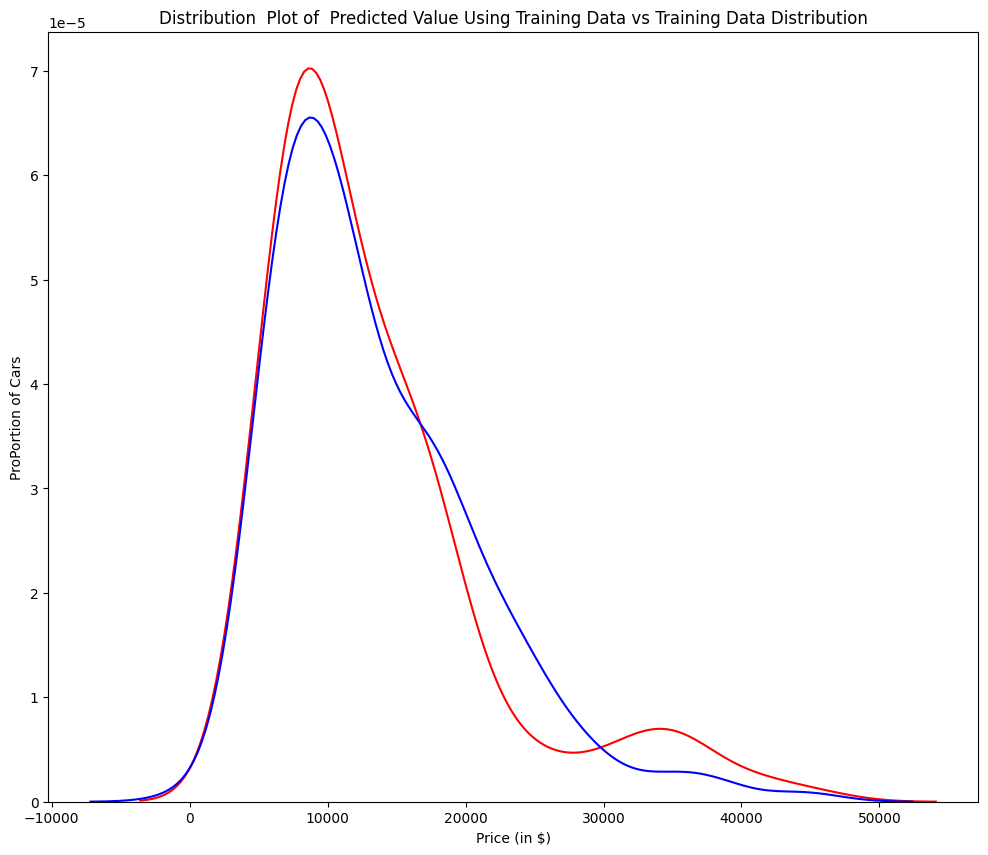

In [42]:
Title = "Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution"
DistributionPlot(y_train, yhat_train, "Actual Values (Train)",
                 "Predicted Values (Train)", Title)

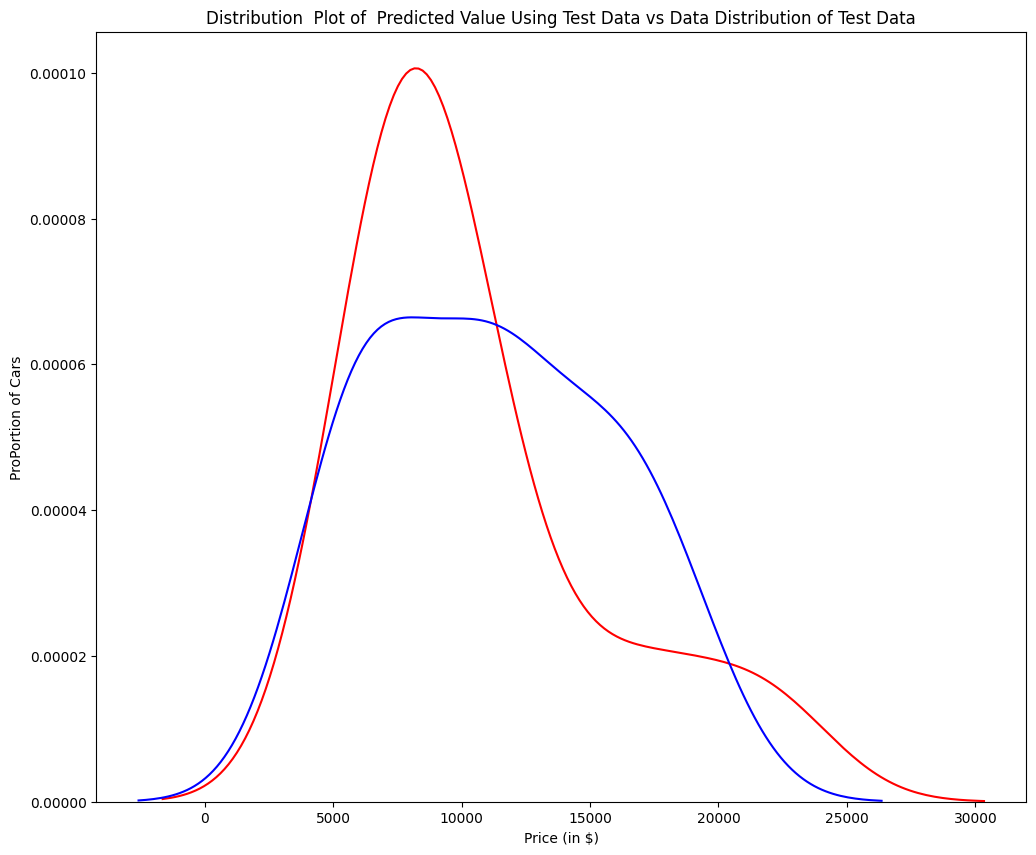

In [43]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)",
                 "Predicted Values (Test)", Title)

# OverFitting


In [44]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.45, random_state=0)

In [47]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [49]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [50]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65566037,  7307.9878638 , 12213.7877412 , 18893.24796457,
       19995.95185894])

In [51]:
print("Predicted values", yhat[0:5])
print("true Values", y_test[0:4].values)

Predicted values [ 6728.65566037  7307.9878638  12213.7877412  18893.24796457
 19995.95185894]
true Values [ 6295. 10698. 13860. 13499.]


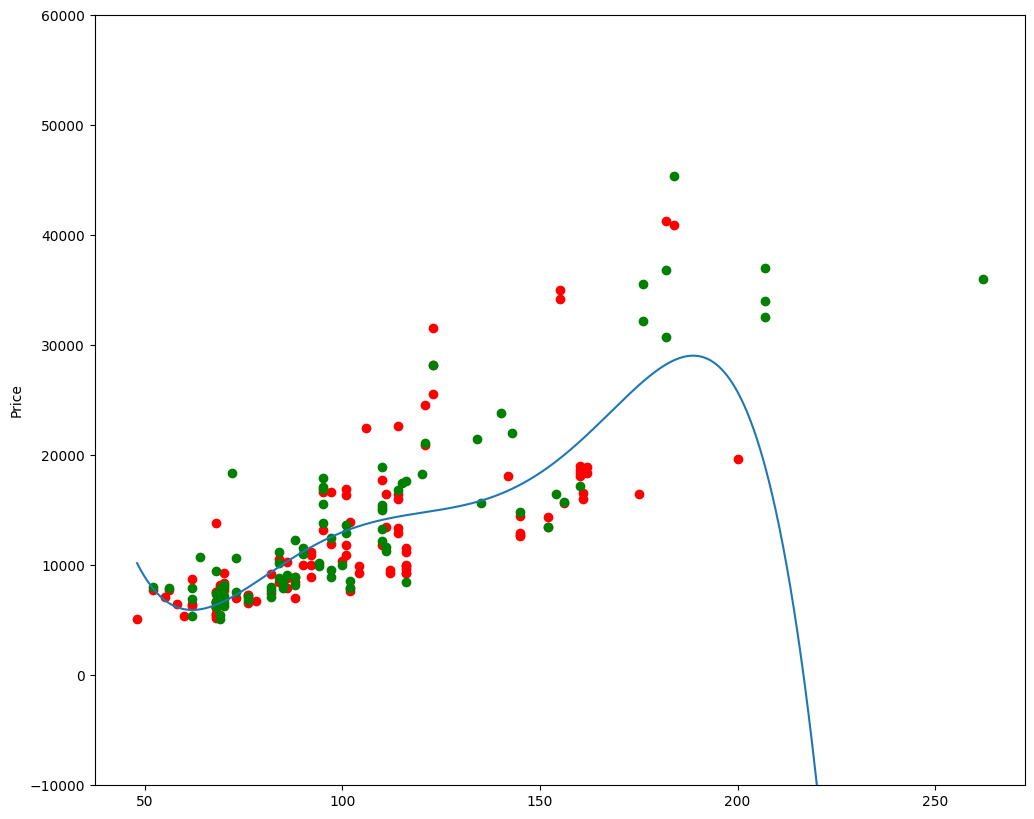

In [60]:
PlotPolly(x_train['horsepower'], x_test['horsepower'],
          y_train, y_test, poly, pr)

In [61]:
poly.score(x_train_pr, y_train)

0.5567716902121584

In [62]:
poly.score(x_test_pr, y_test)

-29.871340540625305

Text(3, 0.75, 'Maximum R^2')

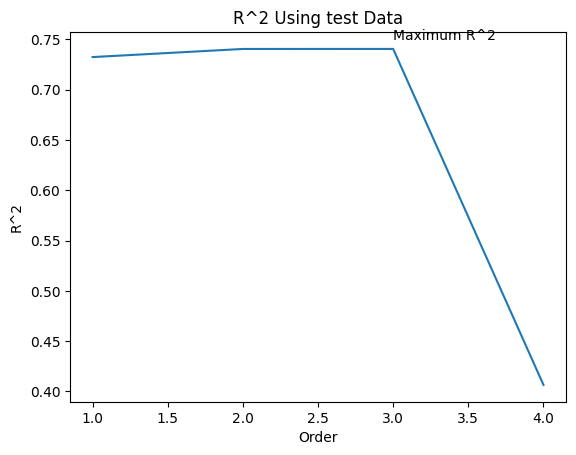

In [64]:
rsqu_test = []
order = [1, 2, 3, 4]

for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train[["horsepower"]])
    x_test_pr = pr.fit_transform(x_test[["horsepower"]])

    lr.fit(x_train_pr, y_train)

    rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, rsqu_test)
plt.xlabel("Order")
plt.ylabel("R^2")
plt.title("R^2 Using test Data")
plt.text(3, 0.75, "Maximum R^2")

In [67]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PlotPolly(x_train['horsepower'], x_test['horsepower'],
              y_train, y_test, poly, pr)

In [70]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [71]:
pr1 = PolynomialFeatures(degree=2)

In [89]:
x_train_pr1 = pr1.fit_transform(
    x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(
    x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [84]:
x_train_pr1.shape

(110, 15)

In [85]:
poly1 = LinearRegression().fit(x_train_pr1, y_train)

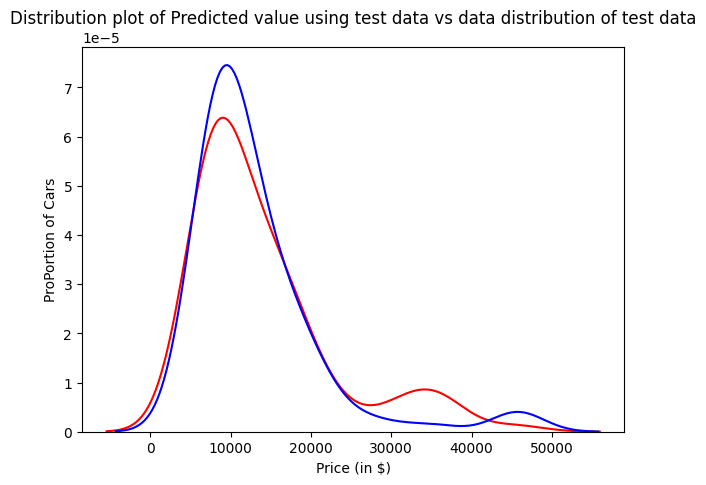

In [92]:
yhat_test1 = poly1.predict(x_test_pr1)

Title = "Distribution plot of Predicted value using test data vs data distribution of test data"

DistributionPlot(y_test, yhat_test1, "Actual Values(Test)",
                 "Predicted Values (Test)", Title)

##### As We Can See that, The Predicted Values is higher than actual value for cars where the price ranges $10,000, conversely the predicted price is lower than the price cost in $30,000 to $40,000 range. As such the model is not as accurate in these ranges.


## Ridge Regression


In [93]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(
    x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform(
    x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])

In [105]:
RigeModel = Ridge(alpha=0.1)

In [106]:
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)

c:\Users\HARIS\anaconda3\envs\NewEnv01\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [107]:
print(f"Predicted {yhat[0:4]}")
print(f"Test set {y_test[0:4].values}")

Predicted [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
Test set [ 6295. 10698. 13860. 13499.]


In [108]:
rsqu_test = []
rsqu_train = []
dummy1 = []

Alpha = 10 * np.array(range(0, 1000))

pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(
        x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test_score": test_score, "Train_score": train_score})

    rsqu_test.append(test_score)
    rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:12<00:00, 79.69it/s, Test_score=0.564, Train_score=0.859]


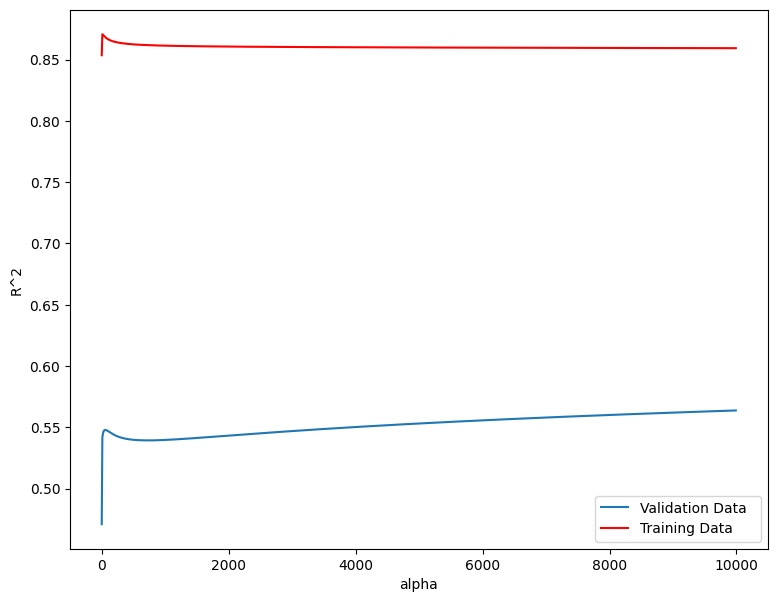

In [109]:
width = 9
height = 7

plt.figure(figsize=(width, height))

plt.plot(Alpha, rsqu_test, label="Validation Data  ")
plt.plot(Alpha, rsqu_train, "r", label="Training Data ")
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.legend()

In [111]:
RigeModel = Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440207246

In [115]:
parameters = [
    {"alpha": [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]
parameters

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

In [116]:
RR = Ridge()
RR

Ridge()

In [117]:
Grid1 = GridSearchCV(RR, parameters, cv=4)

In [119]:
Grid1.fit(x_data[['horsepower', 'curb-weight',
          'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

In [120]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [121]:
BestRR.score(x_test[['horsepower', 'curb-weight',
             'engine-size', 'highway-mpg']], y_test)

0.8411649831036149

In [122]:
parameters2 = [
    {'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight',
          'engine-size', 'highway-mpg']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(
    x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)